✅ Dataset loaded successfully!

🔍 Checking for missing values:
feature1    0
feature2    0
feature3    0
target      0
dtype: int64

📊 KS Test Results for Data Drift Detection:
feature1: KS Statistic = 0.160, P-Value = 0.549
feature2: KS Statistic = 0.140, P-Value = 0.717
feature3: KS Statistic = 0.120, P-Value = 0.869

🔍 Interpretation of KS Test results:
No significant data drift detected for 'feature1' (p-value >= 0.05)
No significant data drift detected for 'feature2' (p-value >= 0.05)
No significant data drift detected for 'feature3' (p-value >= 0.05)


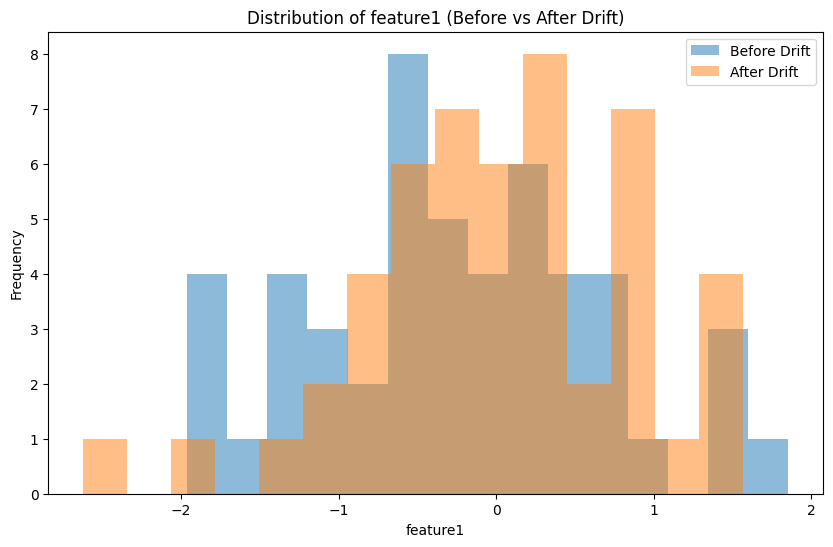

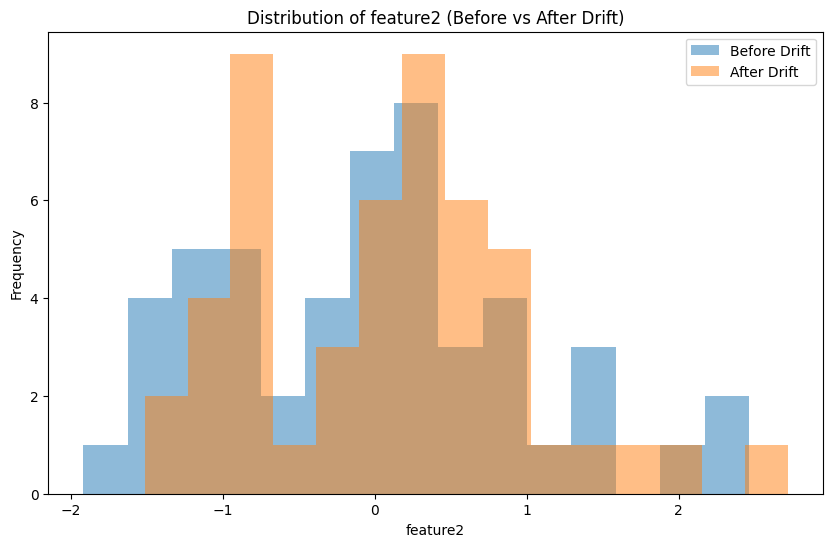

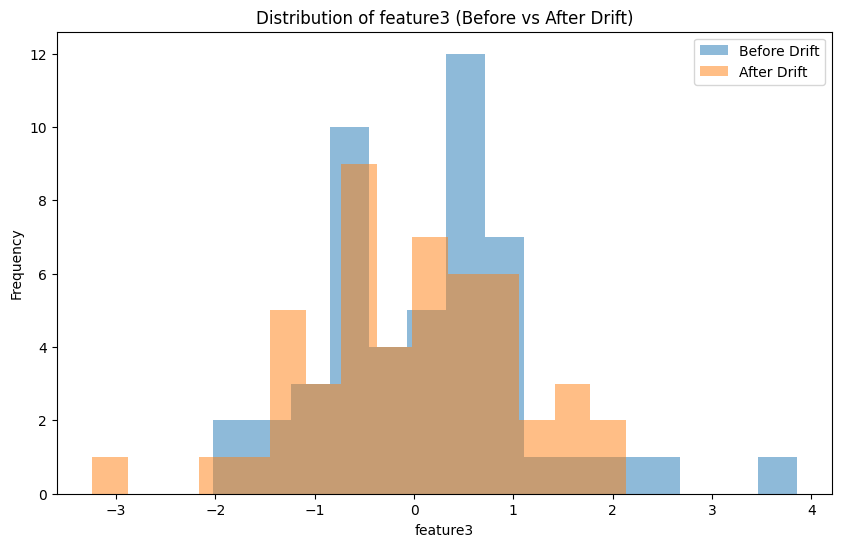

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import ks_2samp
import matplotlib.pyplot as plt

# ------------------------------
# Step 1: Load Data (You can replace with your own dataset path)
# ------------------------------
# If you don't have the actual dataset, you can use this synthetic dataset:
np.random.seed(42)

# Creating synthetic data
data = {
    'feature1': np.random.randn(100),  # Normally distributed data
    'feature2': np.random.randn(100),  # Normally distributed data
    'feature3': np.random.randn(100),  # Normally distributed data
    'target': np.random.choice([0, 1], size=100)  # Binary target
}

# Convert the dictionary to DataFrame
df = pd.DataFrame(data)

# Optionally, save to CSV
df.to_csv('sample_data.csv', index=False)

# Load the dataset (replace 'sample_data.csv' with your actual file path)
try:
    df = pd.read_csv('sample_data.csv')  # Adjust path to your dataset
    print("✅ Dataset loaded successfully!")
except FileNotFoundError:
    print("❌ Error: The file does not exist.")
    raise

# ------------------------------
# Step 2: Data Preprocessing (Handle Missing Values)
# ------------------------------
# Check for missing values
print("\n🔍 Checking for missing values:")
missing_values = df.isnull().sum()
print(missing_values)

# If there are missing values, you can choose to fill them with the mean or drop them
# Example: Filling missing values with mean for each column
df = df.fillna(df.mean())

# ------------------------------
# Step 3: Statistical Testing for Data Drift
# ------------------------------

# Split data into two datasets to simulate data drift
# Assuming 'data_before' is the baseline data and 'data_after' is the drifted data
# Here we simulate this by splitting the dataframe into two halves

# Simulate before and after drift (you can replace this with actual data)
data_before = df.iloc[:50]  # First 50 rows as baseline data
data_after = df.iloc[50:]  # Last 50 rows as drifted data

# Perform KS Test for each feature
ks_results = {}

for column in ['feature1', 'feature2', 'feature3']:
    # KS test between before and after datasets for each feature
    ks_statistic, ks_p_value = ks_2samp(data_before[column], data_after[column])
    ks_results[column] = {'KS Statistic': ks_statistic, 'P-Value': ks_p_value}

# Display KS Test results
print("\n📊 KS Test Results for Data Drift Detection:")
for feature, result in ks_results.items():
    print(f"{feature}: KS Statistic = {result['KS Statistic']:.3f}, P-Value = {result['P-Value']:.3f}")

# Interpretation of KS Test results
print("\n🔍 Interpretation of KS Test results:")
for feature, result in ks_results.items():
    if result['P-Value'] < 0.05:
        print(f"Data Drift detected for '{feature}' (p-value < 0.05)")
    else:
        print(f"No significant data drift detected for '{feature}' (p-value >= 0.05)")

# ------------------------------
# Step 4: Visualize Data Drift (Optional)
# ------------------------------
# Visualize the distributions of features before and after data drift

for column in ['feature1', 'feature2', 'feature3']:
    plt.figure(figsize=(10, 6))
    plt.hist(data_before[column], alpha=0.5, label='Before Drift', bins=15)
    plt.hist(data_after[column], alpha=0.5, label='After Drift', bins=15)
    plt.title(f"Distribution of {column} (Before vs After Drift)")
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.legend(loc='upper right')
    plt.show()

# ------------------------------
# Step 5: Model Evaluation (Optional)
# ------------------------------
# If you have a trained model, you can evaluate the model on the before and after datasets.
# This part assumes you already have a model (e.g., a classifier or regressor).
